Import necessary Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Read csv

In [30]:
Iris = pd.read_csv("Iris.csv")

In [5]:
Iris.shape

(150, 6)

In [6]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
Iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis

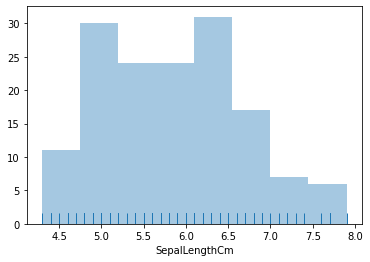

In [21]:
sns.distplot(Iris["SepalLengthCm"],kde=False, rug=True)

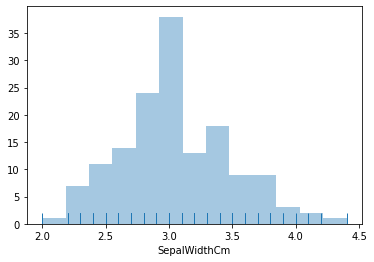

In [22]:
sns.distplot(Iris["SepalWidthCm"],kde=False, rug=True)

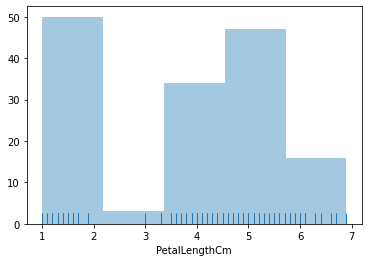

In [23]:
sns.distplot(Iris["PetalLengthCm"],kde=False, rug=True ,hue)

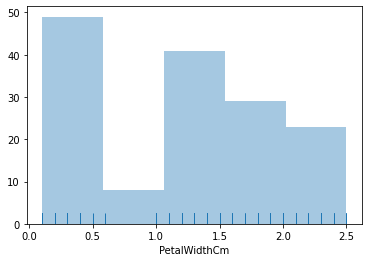

In [24]:
sns.distplot(Iris["PetalWidthCm"],kde=False, rug=True)

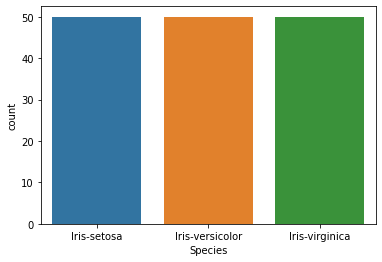

In [25]:
sns.countplot(Iris["Species"])

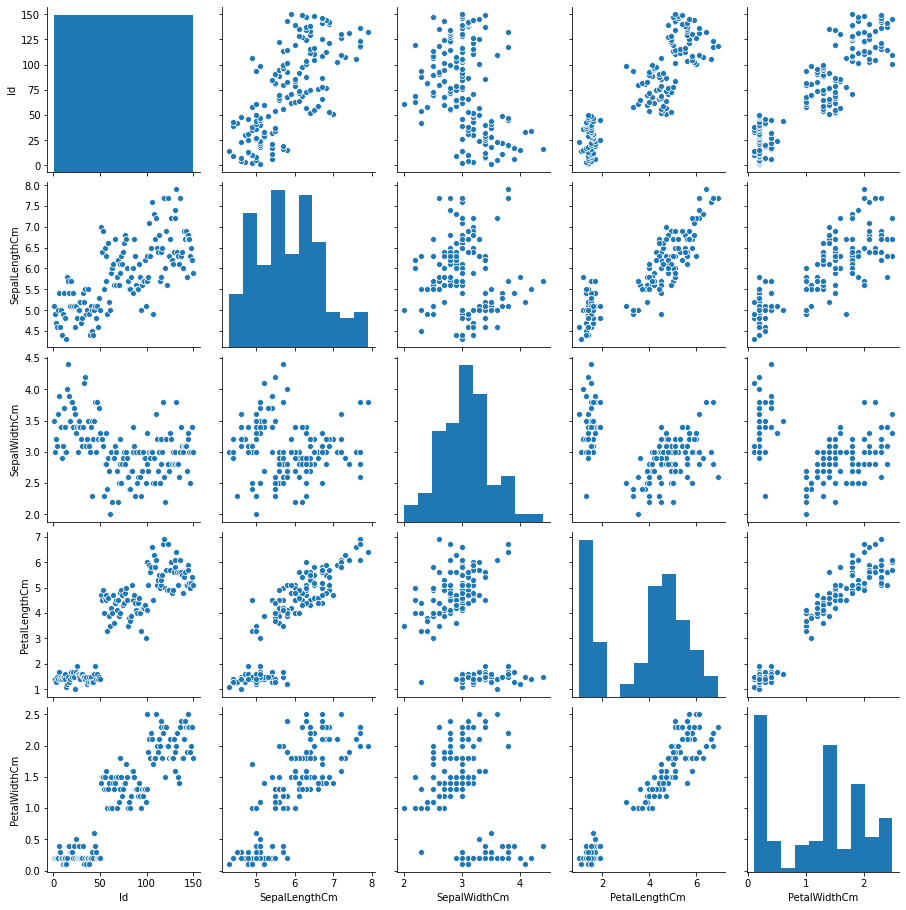

In [26]:
sns.pairplot(Iris)

Setting feature variable as "X" and target variable as "y"

In [27]:
X = Iris.drop(["Species"],axis = 1)
y = Iris["Species"]

Decision tree classifier

In [58]:
des = DecisionTreeClassifier()

des.fit(X,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Importing libraries

In [59]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

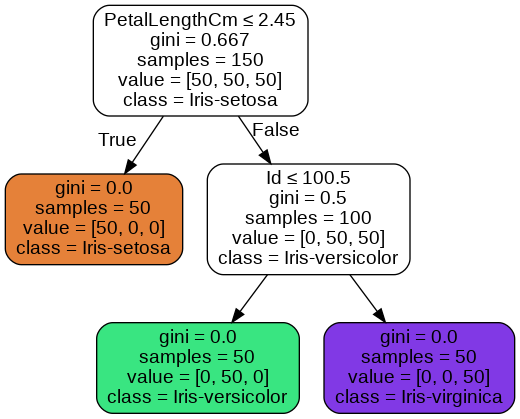

In [62]:
dot_data = StringIO()
export_graphviz(des, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())

Applying standard Scalar to feature variable

In [32]:
scalar = StandardScaler()
X_std = scalar.fit_transform(X)

Train test split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state = 660)

Decisiontree Model apply

In [52]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = cfl.predict(X_test)


In [53]:
print("The accuracy is :",metrics.accuracy_score(y_test,y_pred))

The accuracy is : 0.9777777777777777


In [54]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



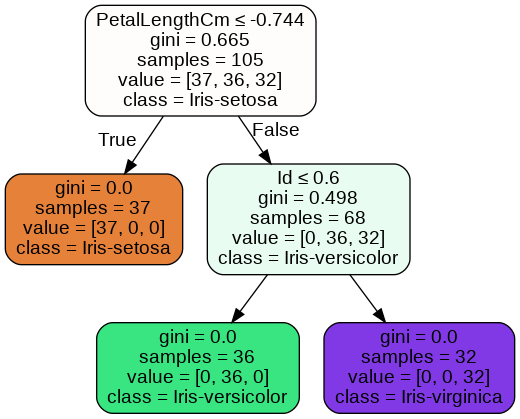

In [56]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())